# **Importing Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading the Dataset**

In [4]:
df=pd.read_csv("/content/train_1.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Distribution of numerical features**

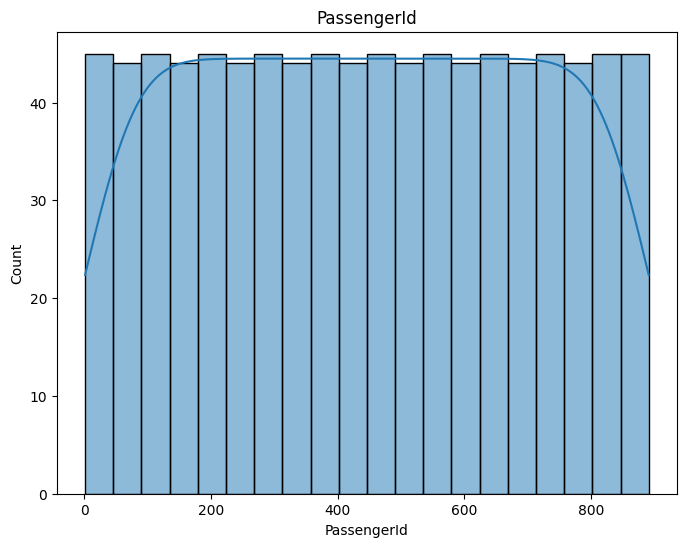

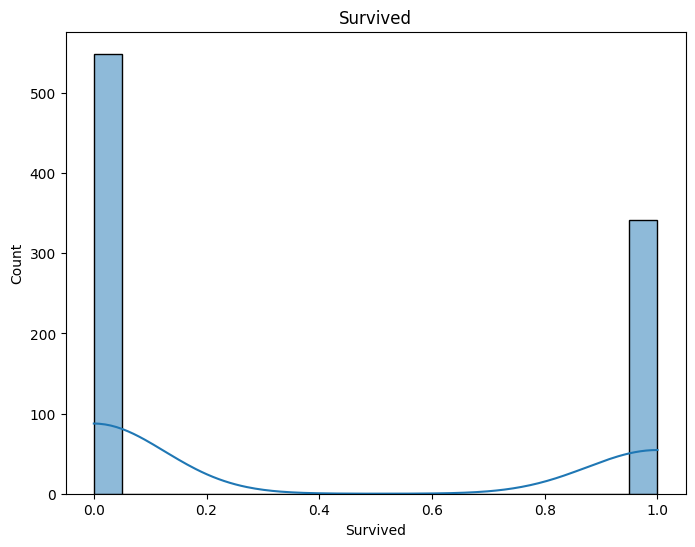

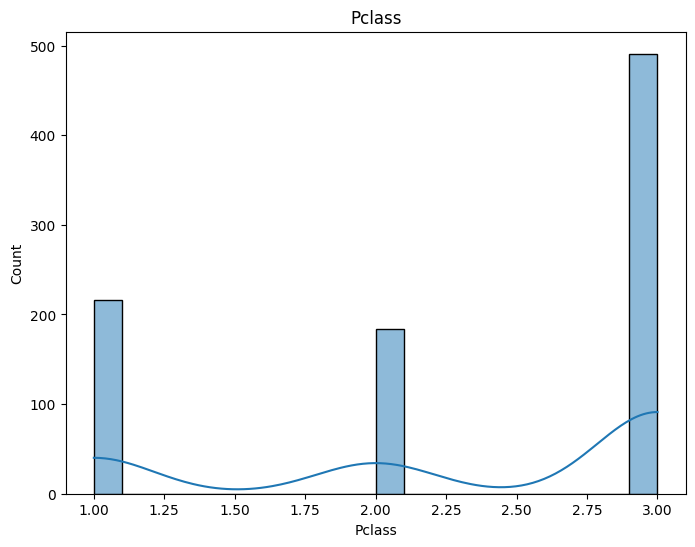

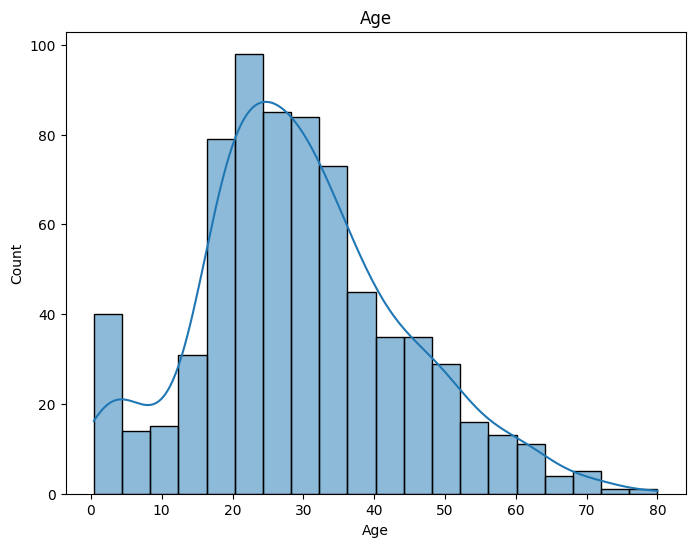

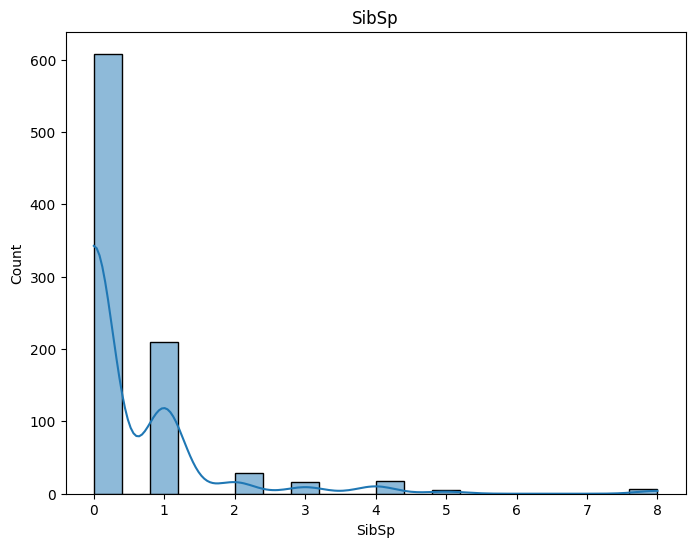

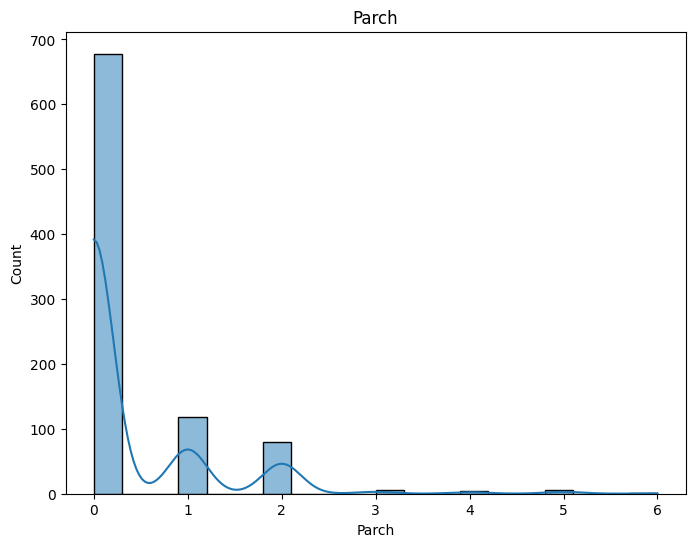

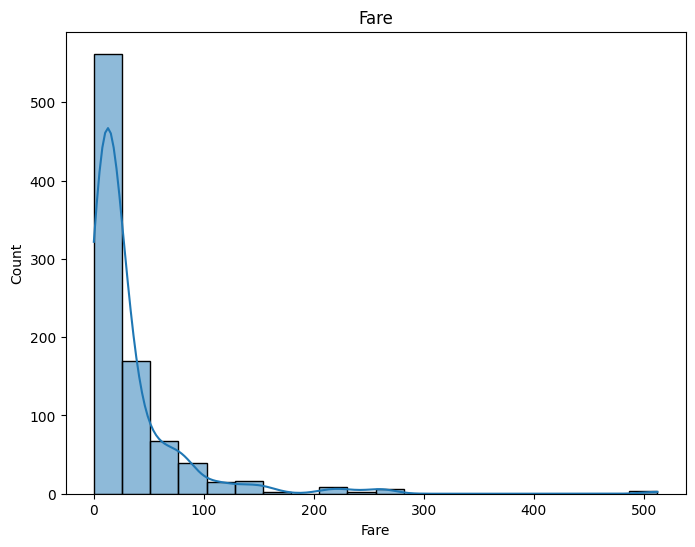

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
    plt.show()

# **Pairplot**

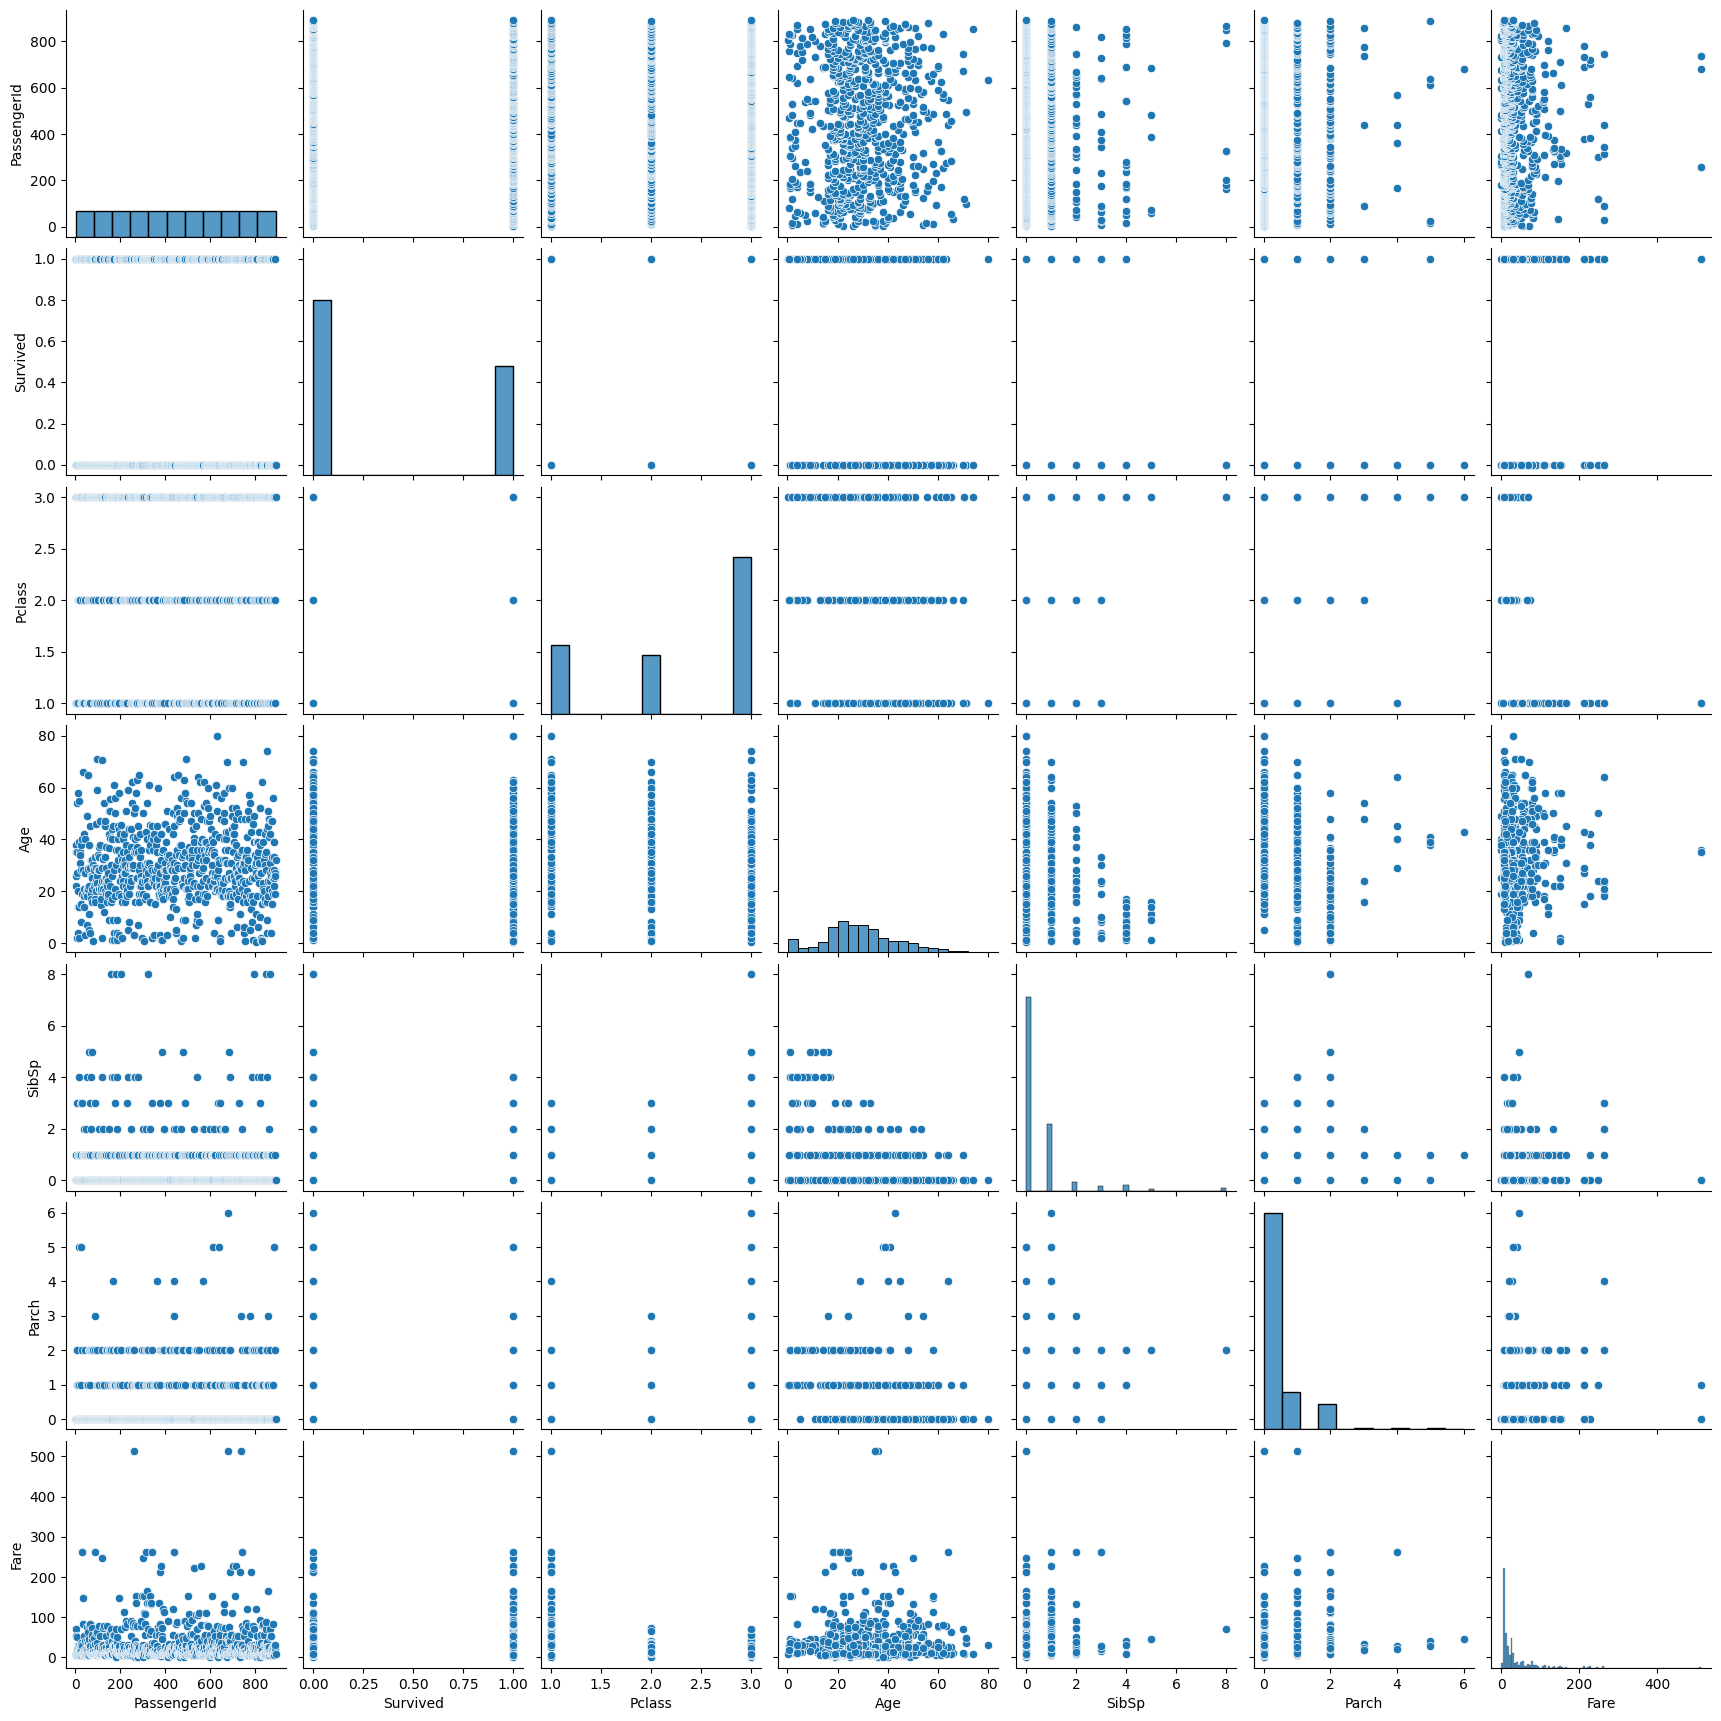

In [19]:
sns.pairplot(df)
plt.show()

# **Defining Age Groups**

In [10]:
age_ranges = [(0, 18), (19, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 100)]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-100']

# Function to categorize age into age ranges
def categorize_age(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age <= end:
            return labels[i]
    return 'Unknown'

# Apply the function to create a new column 'AgeRange'
df['AgeRange'] = df['Age'].apply(categorize_age)

# Display the first few rows to verify
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeRange  
0      0         A/5 21171   7.2500   NaN        S    19-30  
1      0          PC 17599  71.2833   C85        C    31-40  
2      0  STON/O2. 3101282   7.9250   NaN        S    19-30  
3      0            113803  53.1000  C123        S    31-40  
4      0  

# **Boxplot for people survived from different age group**

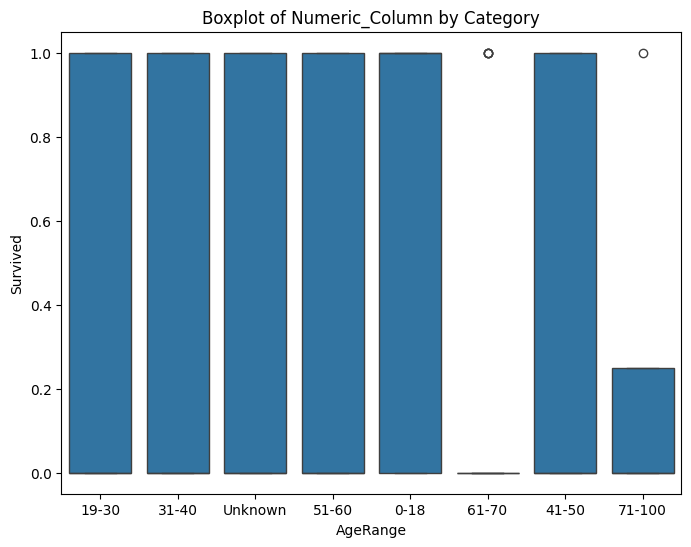

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='AgeRange', y='Survived', data=df)
plt.title('Boxplot of Numeric_Column by Category')
plt.show()

# **Countplot for people from different class**

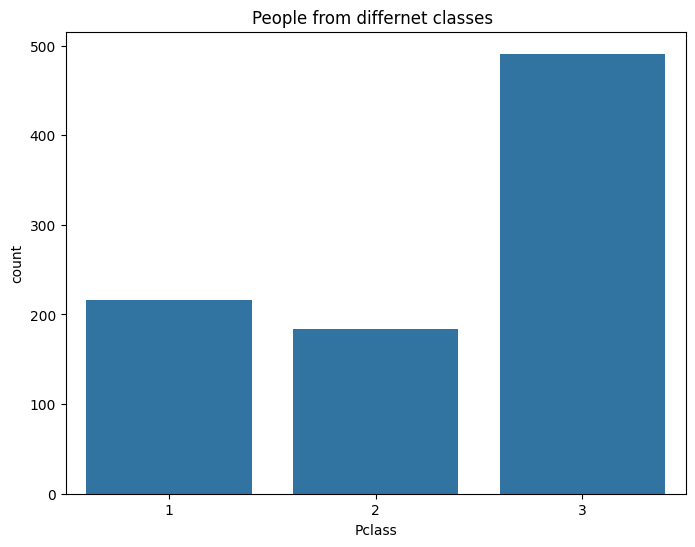

In [19]:
# Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('People from differnet classes ')
plt.show()